In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df  = pd.read_csv("game1.csv")

In [3]:
df.set_index('Rounds', inplace=True)

In [4]:
df.head()

,Aaditya,Manav,Sushant,Gaurab,Mith
Rounds,,,,,
1,5,0,5,5,5
2,0,5,15,20,5
3,10,5,0,5,5
4,5,5,0,25,30
5,0,10,10,10,20


In [5]:
df.describe()

,Aaditya,Manav,Sushant,Gaurab,Mith
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,10.833333,6.944444,8.888889,15.000000,11.666667
std,14.476147,6.216413,8.498366,16.977494,20.073395
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,1.250000,5.000000,0.000000
50%,5.000000,5.000000,7.500000,7.500000,5.000000
75%,8.750000,10.000000,13.750000,23.750000,12.500000
max,45.000000,25.000000,30.000000,60.000000,80.000000


In [6]:
print(df)

        Aaditya  Manav  Sushant  Gaurab  Mith
Rounds                                       
1             5      0        5       5     5
2             0      5       15      20     5
3            10      5        0       5     5
4             5      5        0      25    30
5             0     10       10      10    20
6             5      5       10      25     0
7            20      0       10       5     5
8            30      5       20       5     0
9             5     10        0       5    35
10           45     10        5       0    15
11            5      5        0      60    80
12            5     25        0       5     5
13           45      0        5      25     5
14            0     10       10      10     0
15            5      0       15      50     0
16            5     15       20       0     0
17            5     10       30       0     0
18            0      5        5      15     0


<Axes: ylabel='Rounds'>

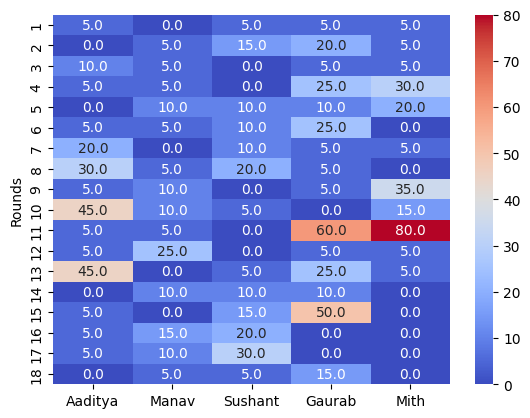

In [7]:
pivot_data = df
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".1f")

In [8]:
for index, row in df.iterrows():
    sum_row = row.sum() 
    for column, cell_value in row.items():
        if cell_value == 0:
            print(f"Index: {index}, Total: {sum_row}, Winner: {column}")

Index: 1, Total: 20, Winner: Manav
Index: 2, Total: 45, Winner: Aaditya
Index: 3, Total: 25, Winner: Sushant
Index: 4, Total: 65, Winner: Sushant
Index: 5, Total: 50, Winner: Aaditya
Index: 6, Total: 45, Winner: Mith
Index: 7, Total: 40, Winner: Manav
Index: 8, Total: 60, Winner: Mith
Index: 9, Total: 55, Winner: Sushant
Index: 10, Total: 75, Winner: Gaurab
Index: 11, Total: 150, Winner: Sushant
Index: 12, Total: 40, Winner: Sushant
Index: 13, Total: 80, Winner: Manav
Index: 14, Total: 30, Winner: Aaditya
Index: 14, Total: 30, Winner: Mith
Index: 15, Total: 70, Winner: Manav
Index: 15, Total: 70, Winner: Mith
Index: 16, Total: 40, Winner: Gaurab
Index: 16, Total: 40, Winner: Mith
Index: 17, Total: 45, Winner: Gaurab
Index: 17, Total: 45, Winner: Mith
Index: 18, Total: 25, Winner: Aaditya
Index: 18, Total: 25, Winner: Mith


In [9]:
for index, row in df.iterrows():
    sum_row = row.sum()  # Calculating the sum of the row values
    winners = [col for col, val in row.items() if val == 0]
    num_winners = len(winners)
    
    if sum_row != 0 and num_winners > 0:
        debt_per_winner = sum_row / num_winners
        for winner in winners:
            print(f"At Index: {index}, {winner} owes: {debt_per_winner}")

At Index: 1, Manav owes: 20.0
At Index: 2, Aaditya owes: 45.0
At Index: 3, Sushant owes: 25.0
At Index: 4, Sushant owes: 65.0
At Index: 5, Aaditya owes: 50.0
At Index: 6, Mith owes: 45.0
At Index: 7, Manav owes: 40.0
At Index: 8, Mith owes: 60.0
At Index: 9, Sushant owes: 55.0
At Index: 10, Gaurab owes: 75.0
At Index: 11, Sushant owes: 150.0
At Index: 12, Sushant owes: 40.0
At Index: 13, Manav owes: 80.0
At Index: 14, Aaditya owes: 15.0
At Index: 14, Mith owes: 15.0
At Index: 15, Manav owes: 35.0
At Index: 15, Mith owes: 35.0
At Index: 16, Gaurab owes: 20.0
At Index: 16, Mith owes: 20.0
At Index: 17, Gaurab owes: 22.5
At Index: 17, Mith owes: 22.5
At Index: 18, Aaditya owes: 12.5
At Index: 18, Mith owes: 12.5


In [10]:
winners_owed = {}

for index, row in df.iterrows():
    sum_row = row.sum()  
    winners = [col for col, val in row.items() if val == 0]
    num_winners = len(winners)
    
    if sum_row != 0 and num_winners > 0:
        debt_per_winner = sum_row / num_winners
        for winner in winners:
            if winner not in winners_owed:
                winners_owed[winner] = 0
            winners_owed[winner] += debt_per_winner

for winner, amount in winners_owed.items():
    print(f"{winner}: {amount}")

Manav: 175.0
Aaditya: 122.5
Sushant: 335.0
Mith: 210.0
Gaurab: 117.5


In [11]:
sum_owed = {player1: {player2: 0 for player2 in df.columns} for player1 in df.columns}

for player1, col1 in df.items():
    for player2, col2 in df.items():
        if player1 != player2:
            for score1, score2 in zip(col1, col2):
                if score1 > score2:
                    sum_owed[player1][player2] += score1 - score2

# Display the sum of how much one player owes to another player
for player1, debts in sum_owed.items():
    for player2, amount in debts.items():
        if amount > 0:
            print(f"{player1} owes {amount} to {player2}")

Aaditya owes 140 to Manav
Aaditya owes 130 to Sushant
Aaditya owes 120 to Gaurab
Aaditya owes 140 to Mith
Manav owes 70 to Aaditya
Manav owes 55 to Sushant
Manav owes 60 to Gaurab
Manav owes 70 to Mith
Sushant owes 95 to Aaditya
Sushant owes 90 to Manav
Sushant owes 75 to Gaurab
Sushant owes 125 to Mith
Gaurab owes 195 to Aaditya
Gaurab owes 205 to Manav
Gaurab owes 185 to Sushant
Gaurab owes 140 to Mith
Mith owes 155 to Aaditya
Mith owes 155 to Manav
Mith owes 175 to Sushant
Mith owes 80 to Gaurab
